Jupyter Notebook can be installed like this (<https://jupyter.org/install>):

`python -m pip install notebook`

It can be then opened by running the following command (from your working directory; make sure to restart your Terminal/Command Line after installation):

`jupyter notebook`

In [4]:
import os
import re
import numpy
from pprint import pprint
import pandas
import matplotlib.pyplot as plt

pandas.set_option("display.max_colwidth", 50)


Let's load our data here:

In [5]:
dispatchFile = "entities.csv"
dispatch = pandas.read_csv(dispatchFile, sep="\t", header=0)

Let's do some minor modification: add a column with all dates of each month changed to 1 (we can use that to aggregate our data into months)

In [6]:
dispatch["month"] = [re.sub("-\d\d$", "-01", str(i)) for i in dispatch["date"]]
# convert into date format
dispatch["month"] = pandas.to_datetime(dispatch["month"], format="%Y-%m-%d")
dispatch["date"] = pandas.to_datetime(dispatch["date"], format="%Y-%m-%d")

# reorder columns
dispatch = dispatch[["itemID", "month", "date", "itemType", "itemUnified", "itemId"]]

In [7]:
dispatch

,itemID,month,date,itemType,itemUnified,itemId
0,1864-04-28_article_001,1864-04-01,1864-04-28,placename,"gordonsville, orange, virginia","tgn,2111971"
1,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
2,1864-04-28_article_002,1864-04-01,1864-04-28,placename,"plymouth, washington, north carolina","tgn,2076159"
3,1864-04-28_article_002,1864-04-01,1864-04-28,persname,"wessels,brigadier-general,,,,","wessels,h.,w."
4,1864-04-28_article_002,1864-04-01,1864-04-28,persname,"lincoln,,,,,",lincoln
...,...,...,...,...,...,...
989392,1864-03-31_article_169,1864-03-01,1864-03-31,persname,"hunt,,chas,,,","hunt,chas"
989393,1864-03-31_article_170,1864-03-01,1864-03-31,persname,"davis,,,,,","davis,waddy"
989394,1864-03-31_article_170,1864-03-01,1864-03-31,placename,"albemarle, virginia, united states","tgn,2002137"
989395,1864-03-31_article_170,1864-03-01,1864-03-31,persname,"cook,,,,,",cook


We can easily count frequencies in the following manner:

In [8]:
dispatch['itemUnified'].value_counts()

richmond, richmond, virginia                          32551
united states                                         19152
virginia, united states, north and central america    11042
washington, district of columbia, united states        8949
virginia                                               7267
                                                      ...  
dubignon,,,,,                                             1
dove,,winton,,,                                           1
leftwich,reverend,james,turner,,                          1
hornback,,l.,joseph,,                                     1
hardin,,jefferson,davis,,                                 1
Name: itemUnified, Length: 147697, dtype: int64

We can also look at a larger part of the table by giving the range of the table:

In [9]:
dispatch['itemUnified'].value_counts().head(50)

richmond, richmond, virginia                          32551
united states                                         19152
virginia, united states, north and central america    11042
washington, district of columbia, united states        8949
virginia                                               7267
charleston, charleston, south carolina                 6943
united kingdom                                         6539
richmond dispatch                                      5161
lincoln,,,,,                                           4681
tennessee                                              4366
kentucky                                               4194
baltimore, baltimore independent city, maryland        4065
petersburg, petersburg, virginia                       4062
north carolina                                         4022
europe,                                                4020
maryland                                               3950
norfolk, norfolk, virginia              

We can also create a subset to focus only on persons (or anything else)

In [10]:
dispatch_persons = dispatch[dispatch["itemType"] == "persname"]

In [11]:
dispatch_persons['itemId'].value_counts().head(50)

lincoln,abraham      3283
lincoln              3168
mcclellan            2649
grant                2284
davis,jefferson      2232
sherman              1955
winder               1800
beauregard           1457
seward               1448
lee                  1407
butler               1372
banks                1278
burnside             1187
trenholm,g.,a.       1149
hill                 1040
jackson              1004
bragg                1002
price                 985
johnston              960
house                 955
scott                 937
hood                  912
wheat                 903
thomas                894
longstreet            856
cook                  855
lyons                 822
lee,r.,e.             811
rosecrans             787
letcher,john          778
lincoln,abe           775
napoleon              766
breckinridge          702
fremont               696
james                 695
anderson              693
forrest               689
floyd                 686
hunter      

In the following few lines of code we can:

- filter our results to pick only the values that we need;
- then plot them on a graph to see how our selected values behaved over time;

In [2]:
var = "lincoln" # this is our variable

results = dispatch_persons[dispatch_persons.itemUnified.str.contains(var)] # selects only rows where itemUnified contains our `var`;
results = results[["month", "itemType"]] # selecting only two columns (making our table smaller);
results = results.groupby(["month"]).count() # counting all occurences of our `var` during each month;
results = results.reset_index() # this resets the index of the dataframe (necessary step);
results[var] = results["itemType"] # here we create a new column named with our `var`
results = results[["month", var]] # again, select only necessary columns

results.head(10)

NameError: name 'dispatch_persons' is not defined

We can now plot this data onto a graph, where `month` will be on the x-axis, and the counts of our `var` will be mapped on the y-axis.

<AxesSubplot:xlabel='month'>

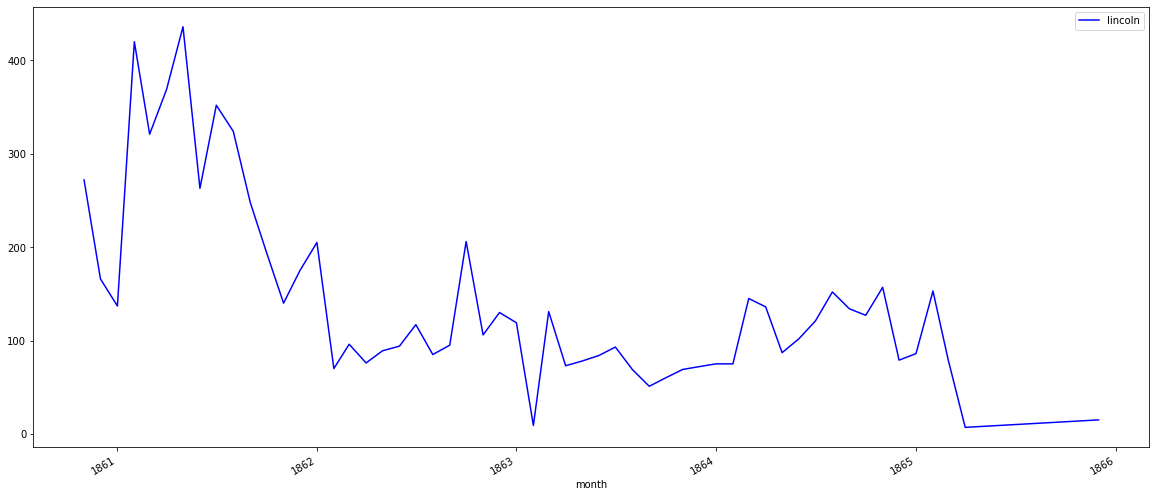

In [22]:
# Plotting directly from DataFrames with Pandas; this section alon is actually enough
results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='blue'
)

The code above is sufficient to print the graph out, but we can also customize how it
looks with the following additional lines of code. You can play around with the parameters to change how it looks (you may need to google for soem additional parameters):

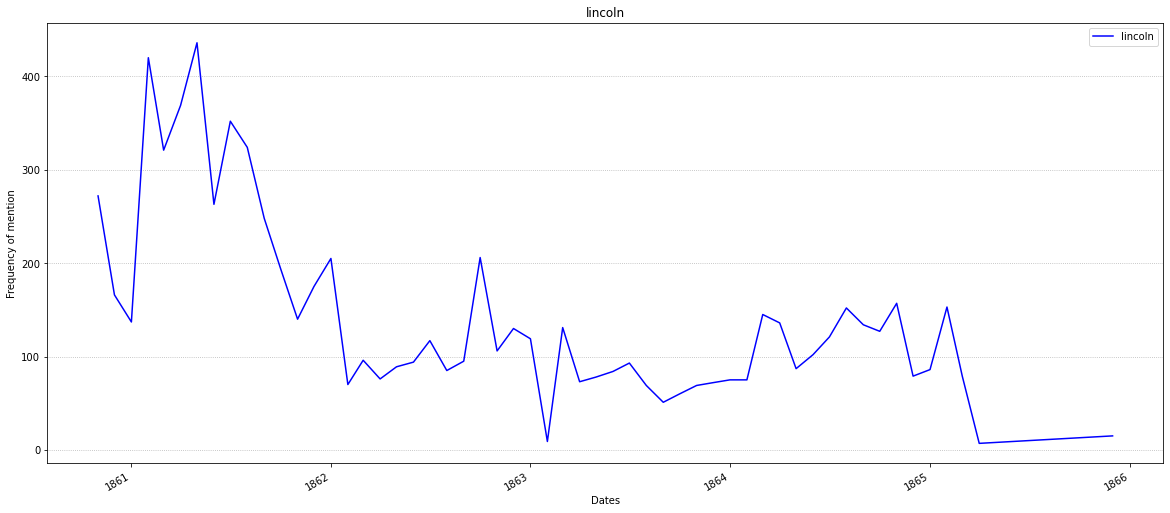

In [23]:
results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='blue'
)

plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel("Frequency of mention")
plt.xlabel("Dates")
plt.title(var)
plt.gca().yaxis.grid(linestyle=':')

Now, we can reuse the following chunk of code to test multiple variables:

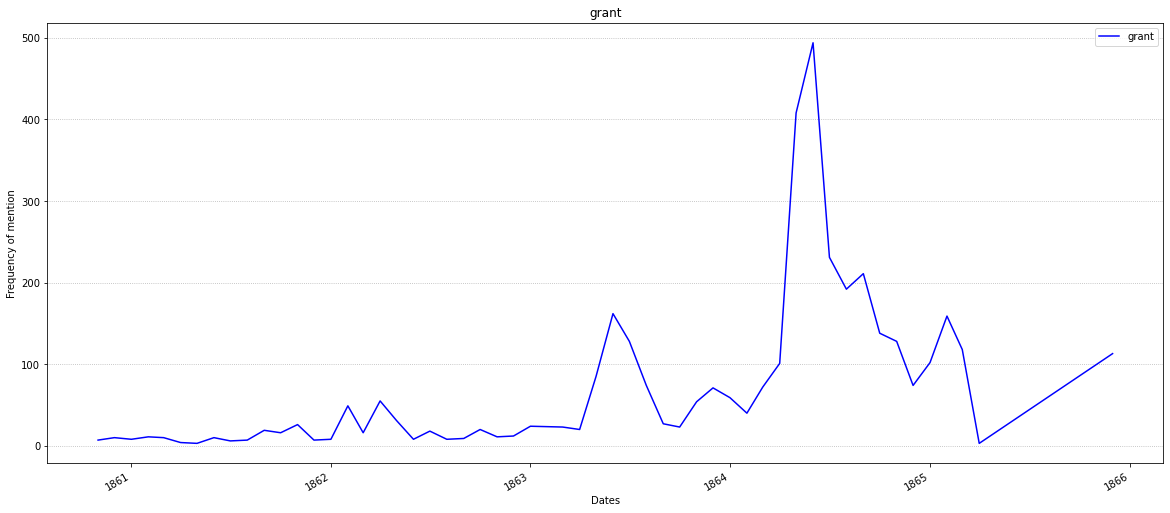

In [24]:
var = "grant" # this is our variable

results = dispatch_persons[dispatch_persons.itemUnified.str.contains(var)] # selects only rows where itemUnified contains our `var`;
results = results[["month", "itemType"]] # selecting only two columns (making our table smaller);
results = results.groupby(["month"]).count() # counting all occurences of our `var` during each month;
results = results.reset_index() # this resets the index of the dataframe (necessary step);
results[var] = results["itemType"] # here we create a new column named with our `var`
results = results[["month", var]] # again, select only necessary columns

results.plot(
    x='month', 
    y=var,  
    legend=True, 
    color='blue'
)

plt.rcParams["figure.figsize"] = (20,9)
plt.ylabel("Frequency of mention")
plt.xlabel("Dates")
plt.title(var)
plt.gca().yaxis.grid(linestyle=':')